In [26]:
# Dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Read in the wine recognition data set from sklearn and load into Pandas
data = dta.load_wine()
wine_data = pd.DataFrame(data.data,columns=data.feature_names)
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
#Observe the dataset
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


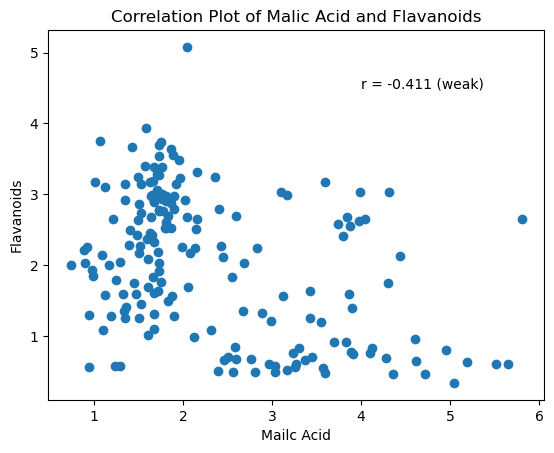

In [11]:
# Plot flavanoids versus malic_acid on a scatterplot
# Isolate the data
malic_acid = wine_data.iloc[:,1]
flavanoids = wine_data.iloc[:,6]

# Calculate the correlation
correlation = st.pearsonr(malic_acid, flavanoids)
r_stat = round(correlation[0], 3)

#Plot the datapoints
plt.scatter(malic_acid, flavanoids)
plt.title("Correlation Plot of Malic Acid and Flavanoids")
plt.xlabel("Mailc Acid")
plt.ylabel("Flavanoids")

#Add the r-value
plt.text(4, 4.5, f'r = {r_stat} (weak)')

#Display and save the figure
plt.savefig("Malic Acid vs Flavanoids Correlation Plot.png")
plt.show()


In [12]:
# Calculate the correlation coefficient between malic_acid and flavanoids
print(f'The correlation coefficient between malic acid and flavanoids is {round(r_stat, 2)}')

The correlation coefficient between malic acid and flavanoids is -0.41


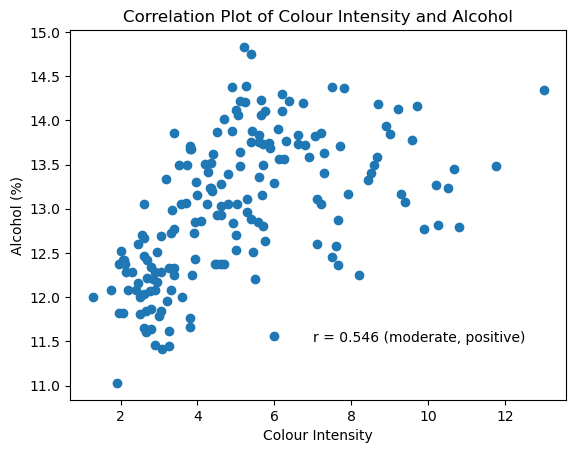

In [20]:
# Plot colour_intensity versus alcohol on a scatterplot
# Isolate the data
colour_intensity = wine_data.iloc[:,9]
alcohol = wine_data.iloc[:,0]

#Calculate correlation
correlation2 = st.pearsonr(colour_intensity, alcohol)
r_stat2 = round(correlation2[0], 3)

#Plot the datapoints
plt.scatter(colour_intensity, alcohol)
plt.title("Correlation Plot of Colour Intensity and Alcohol")
plt.xlabel("Colour Intensity")
plt.ylabel("Alcohol (%)")

#Add the r stat
plt.text(7, 11.5, f'r = {r_stat2} (moderate, positive)')

#Save and display the plot
plt.savefig("Colour Intensity vs Alcohol Correlation Plot.png")
plt.show()

In [21]:
# Calculate the correlation coefficient between alcohol and colour_intensity
print(f'The correlation coefficient between alcohol and color intensity is {round(r_stat2, 2)}')

The correlation coefficient between alcohol and color intensity is 0.55


In [40]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations
corr_matrix = wine_data.corr(method="pearson")
corr_matrix_list = corr_matrix.unstack()
corr_matrix_list_sorted = corr_matrix_list.sort_values()
corr_matrix_list_sorted = corr_matrix_list_sorted[corr_matrix_list_sorted < 1]

#Strongest correlation values
strongest_neg = corr_matrix_list_sorted.head(1)
print(f'The strongest negative correlation: {strongest_neg}')

strongest_pos = corr_matrix_list_sorted.tail(1)
print(f'The strongest positive correlation: {strongest_pos}')

The strongest negative correlation: malic_acid  hue   -0.561296
dtype: float64
The strongest positive correlation: total_phenols  flavanoids    0.864564
dtype: float64
